In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# ----- Class to manage cosine rate decay -----
# Currently only handles new cycles from epoch boundaries
class CosLearningRateDecay():
    # Note: stateless after initialization
    def __init__(self, start_epoch, stop_epoch, iters_per_epoch, max_lr, min_lr=0.0):
        self.start_epoch = start_epoch
#        self.start_iter = start_iter
        self.max_lr = max_lr
        self.min_lr = min_lr
        self.start_iters = (start_epoch ) * iters_per_epoch
        # spill one
        full_epochs_remaining = stop_epoch - start_epoch# + 1
        #this_epoch_iters_remaining = iters_per_epoch - start_iter
        print("start iters: ", self.start_iters)
        print("full epochs remaining: ", full_epochs_remaining)
        #total number of iterations to be completed this cosine cycle
        self.total_iters_this_cycle = full_epochs_remaining * iters_per_epoch #+ (this_epoch_iters_remaining - stop_iter)
    """
    params:
        total_iter: total number of iterations completed since start

    formula: 
    lr_min + 0.5*(lr_max - lr_min) * (1 + cos(pi*current_total_iter/target_iter))
    """
    def get_lr(self, total_iter):
        iters_elapsed = total_iter - self.start_iters
        #print("Calculating Cos LR")
        #print("Iterations elapsed this cycle: ", iters_elapsed)
        #print("Total iterations to be completed this cycle: ", self.total_iters_this_cycle)
        learning_rate = self.min_lr
        learning_rate += 0.5*(self.max_lr - self.min_lr) * (1 + np.cos(np.pi * (iters_elapsed / self.total_iters_this_cycle)))
        return learning_rate

In [34]:
start_epoch = 100
stop_epoch = 110
iters_per_epoch = 2900
max_lr = 0.001

cos_decay = CosLearningRateDecay(start_epoch, stop_epoch, iters_per_epoch, max_lr)
start_iter = start_epoch*iters_per_epoch

step = 200
pts = np.arange(start_iter, stop_epoch*iters_per_epoch, step)
lr = map(cos_decay.get_lr, pts)
plot = pts/iters_per_epoch

plt.plot(list(plot), list(lr))
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title("10-Epoch cosine LR decay")
plt.savefig('10_epoch_cos_decay.png')
plt.show()

start iters:  290000
full epochs remaining:  10


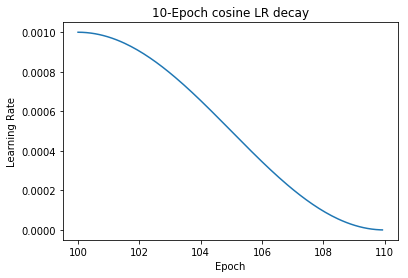

In [35]:
start_epoch = 100
stop_epoch = 120
iters_per_epoch = 2900
max_lr = 0.001

cos_decay = CosLearningRateDecay(start_epoch, stop_epoch, iters_per_epoch, max_lr)
start_iter = start_epoch*iters_per_epoch

step = 200
pts = np.arange(start_iter, stop_epoch*iters_per_epoch, step)
lr = map(cos_decay.get_lr, pts)
plot = pts/iters_per_epoch

plt.plot(list(plot), list(lr))
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title("20-Epoch cosine LR decay")
plt.show()